<a href="https://colab.research.google.com/github/Venkats-AI-codes/AI_practices/blob/main/Evaluating_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4.2.2 Regression model evaluation metrics

1.  R^2 (r-suared) or coefficient of determination
2. Mean absolute error(MAE)
3. Mean sqquared error(MSE)

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [6]:
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
housing_df = pd.DataFrame(df.data)
housing_df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
housing_df.columns = df.feature_names
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
housing_df["Price"] = df.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.iloc[:, :-1]
y = housing_df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [14]:
model.score(x_test, y_test)

0.8066196804802649

In [16]:
y_test.head()

,Price
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000


In [18]:
y_test.mean()

np.float64(2.0550030959302323)

### R^2

compares your model predictions to the mean of the targets. Values can range from negative infinity(a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [24]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [25]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [26]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [27]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

### **Mean Absolute Error (MAE)**

MAE is the average of absolute difference between prediction and actual values

It gives you an idea of how wrong your models predicts are

In [41]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [29]:
y_test

,Price
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


In [42]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [43]:
df["differences"].mean()

np.float64(0.0121069218749996)

In [44]:
# MAE using the formulas and differences
np.abs(df["differences"]).mean()

np.float64(0.3265721842781009)

### **Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [45]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [46]:
df["squared_differences"] =np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [47]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

np.float64(0.2534073069137548)

In [48]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16


/tmp/ipython-input-215/991064158.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [50]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [51]:
# calculate MSE with large error
df_large_error["squared_differences"].mean()

np.float64(0.25728320720794084)

In [54]:
df_large_error.iloc[1:100] = 20
df_large_error.head(10)

,actual values,predicted values,differences,squared_differences
20046,0.477,0.49384,0.01684,16.0
3024,20.000,20.00000,20.00000,20.0
15663,20.000,20.00000,20.00000,20.0
20484,20.000,20.00000,20.00000,20.0
9814,20.000,20.00000,20.00000,20.0
13311,20.000,20.00000,20.00000,20.0
7113,20.000,20.00000,20.00000,20.0
7668,20.000,20.00000,20.00000,20.0
18246,20.000,20.00000,20.00000,20.0
5723,20.000,20.00000,20.00000,20.0


In [55]:
# calculate MSE with large error
df_large_error["squared_differences"].mean()

np.float64(0.7333540351264799)

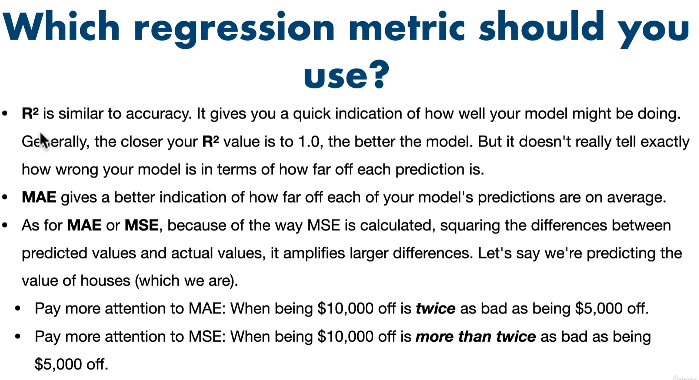

### **using the 'scoring' parameter

In [56]:
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)


In [67]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimator's default scoring evluation matric is used (accuracy for classification models)

In [68]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [69]:
# Cross-validated accuracy
print(f"The cross-validated accuaracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuaracy is: 82.48%


In [70]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [71]:
print(f"The cross-validated accuaracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuaracy is: 82.48%


In [74]:
# Precission
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.90625   , 0.84848485, 0.84375   , 0.75675676])

In [80]:
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8357542034012623


In [78]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.90909091, 0.87878788, 0.72727273, 0.78787879, 0.87878788])

In [81]:
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8363636363636363


Let's see the 'scoring' parameter being using for regression problem...

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.iloc[:, :-1]
y = housing_df.iloc[:, -1]

model = RandomForestRegressor(n_estimators=100)

In [83]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

np.float64(0.6545756342466266)

In [84]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [87]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

np.float64(-0.4820332646560079)

In [89]:
cv_mae

array([-0.51737186, -0.4219676 , -0.50676033])

In [91]:
# mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

np.float64(-0.45772938854774403)

In [90]:
cv_mse

array([-0.51825694, -0.33182055, -0.54435805])

## 4.3 Using different evaluation metrics as scikit-learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the 'sklearn.metrics' module

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Create X & y
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# Create a model
clf = RandomForestClassifier(n_estimators=100)
# Fit model
clf.fit(x_train, y_train)
#Make predictions
y_preds = clf.predict(x_test)
# Evaluate model using evaluation functions
print("Classification metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, clf.predict(x_test))*100:.2f}%")
print(f"precision: {precision_score(y_test, clf.predict(x_test))*100:.2f}%")
print(f"recall: {recall_score(y_test, clf.predict(x_test))*100:.2f}%")
print(f"f1 score: {f1_score(y_test, clf.predict(x_test))*100:.2f}%")

Classification metrics on the test set
Accuracy: 85.25%
precision: 84.85%
recall: 87.50%
f1 score: 86.15%


In [97]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create X & y
x = housing_df.iloc[:, :-1]
y = housing_df.iloc[:, -1]
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# Create a model
model = RandomForestRegressor(n_estimators=100)
# Fit model
model.fit(x_train, y_train)
# make predictions
y_preds = model.predict(x_test)
# Evaluate model using evaluation functions
print("Regression metrics on test set")
print(f"r2 score: {r2_score(y_test, y_preds)}")
print(f"mean absolute error: {mean_absolute_error(y_test, y_preds)}")
print(f"mean squared error: {mean_squared_error(y_test, y_preds)}")

Regression metrics on test set
r2 score: 0.8094425973856642
mean absolute error: 0.3268376173691862
mean squared error: 0.260092917795195
